# **Car Price Prediction Model**
Developed for oasis Internship Task
This project builds a machine learning model to predict car prices based on various factors such as mileage,engine,fuel type. It includes:
 1.Data Ppreprocessing
2. Model Training & Hyperparameter tunning
3.Data Visualization & Model Evaluation

Author: Riya Pandey

In [11]:
# Importing necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
import sklearn.metrics as metrics
from sklearn.metrics import accuracy_score

In [12]:
'''Load and Explore the Dataset'''

# Load the dataset
file_path="/content/car data.csv"
df=pd.read_csv(file_path)

# Display the first few rows of dataset
display(df.head(5))

# Display column names,data types and missing/null values
display(df.info())

# Provide Summary Statsitics for numerical columns--helps understand data distribution
display(df.describe())

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


None

,Year,Selling_Price,Present_Price,Driven_kms,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.642584,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [13]:
''' Data Preprocessing'''

# To handle missing/null values -- remove rows with null values
df=df.dropna()
df=pd.get_dummies(df,drop_first=True)

# Feature Scaling--normalize nonnumeric columns to numeric formate
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
numerical_cols=['Driven_kms']

df[numerical_cols]=scaler.fit_transform(df[numerical_cols])


In [14]:
''' Spltting The Data -- Dividing the dataset into features (X) and target variable (y)'''

X = df.drop(columns=['Selling_Price'])
y = df['Selling_Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
''' Train Machine Learning Models -- Linear regression and Random Forest'''

models={"Linear Regression": LinearRegression(),"Random Forest": RandomForestRegressor(n_estimators=100,random_state=42)} # Changed n_estimators from 00 to 100
for name,model in models.items():
  model.fit(X_train,y_train)
  y_pred=model.predict(X_test)

  print(name)
  print("MSE:",mean_squared_error(y_test,y_pred))
  print("MAE:",mean_absolute_error(y_test,y_pred))
  print("R2 score:",r2_score(y_test,y_pred))

Linear Regression
MSE: 9.221090391449984
MAE: 2.036517478989328
R2 score: 0.5997023481940367
Random Forest
MSE: 0.7524127775409837
MAE: 0.5907721311475411
R2 score: 0.9673369357361763


In [16]:
''' Hyperparameter Tunning'''
# Using gridsearch to optimize the Random Forest

from sklearn.model_selection import GridSearchCV
param_grid = {'n_estimators': [50,100,200],'max_depth':[10,20,None]}
grid_search=GridSearchCV(RandomForestRegressor(),param_grid,cv=3,scoring='r2')
grid_search.fit(X_train,y_train)
best_model=grid_search.best_estimator_
y_pred=best_model.predict(X_test)
print("Best Parameters:",grid_search.best_params_)
print("R2 Score:",r2_score(y_test,y_pred))


Best Parameters: {'max_depth': None, 'n_estimators': 50}
R2 Score: 0.9623204239685723


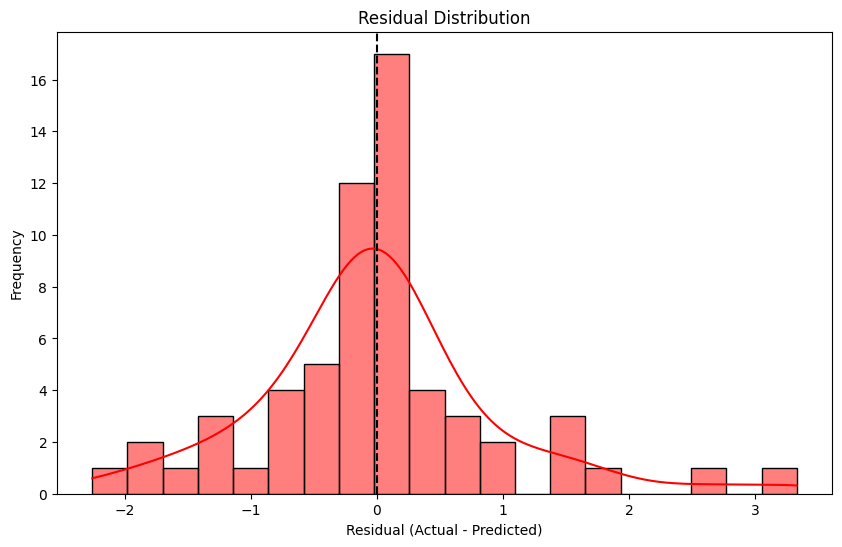

In [17]:
''' Data Visualization'''

#Residual Plotting

from sklearn.metrics import mean_absolute_error
y_pred=best_model.predict(X_test)
residuals=y_test - y_pred
plt.figure(figsize=(10,6))
sns.histplot(residuals,kde=True,color="red")
plt.axvline(x=0,color="black",linestyle="dashed")
plt.title("Residual Distribution")
plt.xlabel("Residual (Actual - Predicted)")
plt.ylabel("Frequency")
plt.show()

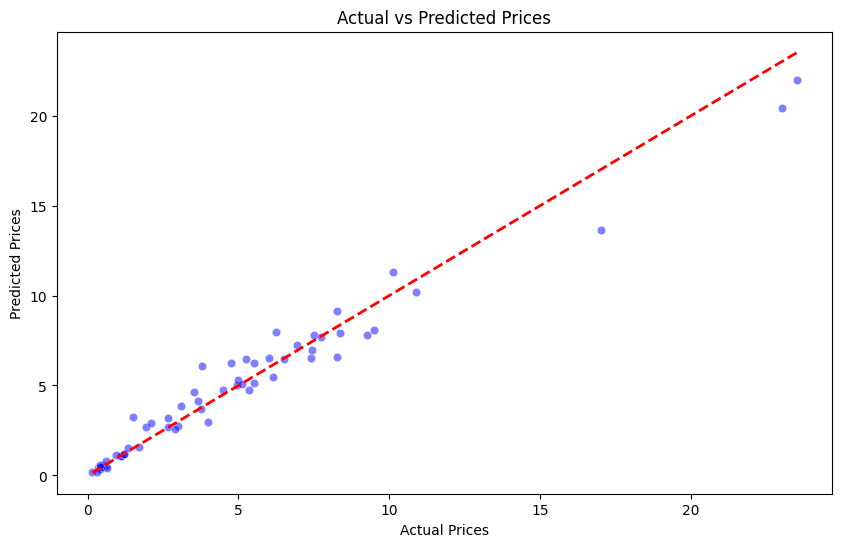

In [18]:
#Actual vs Predicted prices

plt.figure(figsize=(10,6))
# Changed from plt.scatterplot to sns.scatterplot
sns.scatterplot(x=y_test,y=y_pred,color="blue",alpha=0.5)
plt.plot([y_test.min(),y_test.max()],[y_test.min(),y_test.max()],'r--',lw=2)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted Prices")
plt.show()

In [19]:
#Model Evaluation Metrices
r2=r2_score(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
mse=mean_squared_error(y_test,y_pred)
rmse=np.sqrt(mse)

print(f"R2 Score:{r2:.2f}")
print(f"Mean Absolute Error:{mae:.2f}")
print(f"Mean Squared Error:{mse:.2f}")
print(f"Root Mean Squared Error:{rmse:.2f}")

R2 Score:0.96
Mean Absolute Error:0.61
Mean Squared Error:0.87
Root Mean Squared Error:0.93


## **Final Insights**


# 1. We built a Car Price Prediction model using the Car Price Prediction dataset.

# 2. Two machine learning models were implemented:
 Linear Regression and Random Forest Regressor.

# 3. The dataset was preprocessed by selecting key attributes like Driven Kilometers (Mileage), Fuel Type, and Selling Price.

# 5. Random Forest Regressor outperformed Linear Regression with higher accuracy and lower error rates.

# 7. The Actual vs. Predicted Trials graph confirmed that the Random Forest model provides accurate price estimations.

# 8. Overall, the model effectively predicts car prices based on historical data and can be further optimized with additional features.



In [20]:
import joblib
# Assign the model you want to save to the variable 'model'
model = best_model  # Changed 'rf' to 'model'

joblib.dump(model, "model.pkl")
print(" Model saved as model.pkl ")

 Model saved as model.pkl 


In [21]:
pip freeze > requirements.txt
